### Importação de bibliotecas

In [1]:
import numpy as np
import seaborn as sns
import scipy as spy
import pandas as pd

## Carregando os dados através do pandas.

In [2]:
dados = pd.read_csv('dados.csv')

## Visualizando o início

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Distribuição do frame

Distribuição do sexo

In [4]:
quantidade_sexo = dados['Sexo'].value_counts()

In [5]:
percentual_sexo = dados['Sexo'].value_counts(normalize = True) * 100

In [6]:
tabela = pd.DataFrame({'Quantidade por sexo' : quantidade_sexo, 'Percentual' : percentual_sexo})

In [7]:
tabela.rename(index = {0 : 'Masculino', 1 : 'Feminino'}, inplace = True)

In [8]:
tabela.rename_axis('Sexo',axis = 'columns', inplace=True)

In [9]:
tabela

Sexo,Quantidade por sexo,Percentual
Masculino,53250,69.299844
Feminino,23590,30.700156


Distribuição de renda

In [10]:
labels = ['E', 'D', 'C', 'B', 'A']
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [11]:
#Contagem da frequência por classe
frequencia_renda = pd.value_counts(
       pd.cut(dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True
       )
)
#Calculo percentual de cada classe
percentual_renda = pd.value_counts(
       pd.cut(dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True
       ), 
       normalize = True
) * 100

In [13]:
#Criando o dataframe para servir de tabela para a análise
tabela_renda = pd.DataFrame({'Frequência por classe' : frequencia_renda, 'Percentual por classe' : percentual_renda })
tabela_renda.sort_index(ascending=False, inplace= True)
tabela_renda.rename_axis('Classe', axis = 'columns')


Classe,Frequência por classe,Percentual por classe
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


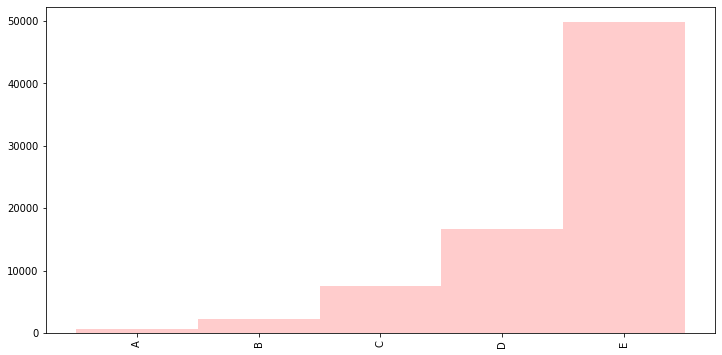

In [36]:
tabela_renda['Frequência por classe'].plot.bar(width= 1, color = 'red', alpha = 0.2, figsize = (12, 6))

Descobrindo o valor ideal de classes

In [14]:
tamanho_dos_dados = dados.shape[0]
valor_ideal = 1 + ((10 / 3) * np.log10(tamanho_dos_dados))
valor_ideal = int(valor_ideal.round(0))

Agora iremos recriar o dataframe com as novas classes de renda.

In [23]:
#Contagem da frequência por classe
frequencia_renda_ideal = pd.value_counts(
       pd.cut(dados.Renda,
       bins = 20,
       include_lowest = True,
       ),
       sort = False
)
#Calculo percentual de cada classe
percentual_renda_ideal = pd.value_counts(
       pd.cut(dados.Renda,
       bins = 20,
       include_lowest = True
       ), 
       normalize = True,
       sort = False
) * 100

In [24]:
tabela_renda_ideal = pd.DataFrame({'Frequência por classe':frequencia_renda_ideal, 'Percentual por classe' : percentual_renda_ideal})
tabela_renda_ideal.rename_axis('Classe', axis = 'columns')

Classe,Frequência por classe,Percentual por classe
"(-200.001, 10000.0]",75466,98.211869
"(10000.0, 20000.0]",1115,1.451067
"(20000.0, 30000.0]",183,0.238157
"(30000.0, 40000.0]",35,0.045549
"(40000.0, 50000.0]",19,0.024727
"(50000.0, 60000.0]",7,0.009110
"(60000.0, 70000.0]",0,0.000000
"(70000.0, 80000.0]",4,0.005206
"(80000.0, 90000.0]",1,0.001301
"(90000.0, 100000.0]",6,0.007808
